<a href="https://colab.research.google.com/github/Rajat-Sri/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised Machine Learning(Clustering)
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajat Srivastava

# **Project Summary -**

**1. Know your data**
  - We found important observations about the dataset such as the presence of missing values, duplicates, and data types of the columns. These observations suggest that further data cleaning and preparation may be needed before applying analytical techniques.

**2. Understanding Your Variables**
 - In this step we analysed variables. The dataset columns are listed and described using the Pandas library's describe() method.The presence of cancellation transactions is identified in the InvoiceNo column. The unique values for each variable are checked. These steps are important for understanding the data and identifying any anomalies or issues that need to be addressed before further analysis.

**3. Data Wrangling**
 - In yhis step we handeld missing and duplicate values, created new features, and checked for outliers. Missing values were removed from the CustomerID and Description columns, and duplicate values were removed from the dataset.We also found basic statistics on the Quantity, UnitPrice, and CustomerID columns, which help to understand the general characteristics of the data, but further analysis is needed to gain more insights.

**4. Data Vizualization**

- Understanding customer behavior: Customer purchase behavior, such as the frequency of purchases, the amount spent, and the types of products purchased were identified. This information can be used to develop marketing strategies, optimize pricing, and tailor promotions to specific customer segments.

- Product performance analysis: We identified the most popular products or product categories among customers, which can inform decisions about inventory management, product development, and marketing strategies.

**5. Hypothesis Testing**

 - The given section describes the process of hypothesis testing through three hypothetical statements. The first statement aims to compare the total amount spent by customers in different countries, while the second statement compares the average quantity of items purchased by customers from different countries. The third statement compares the mean total amount spent by customers in two specific countries, the United Kingdom and France. 
 - In each statement, an appropriate statistical test has been performed, and the obtained p-value has been interpreted to either accept or reject the null hypothesis in favor of the alternative hypothesis. The tests used are ANOVA and two-sample t-test, and they are chosen based on the research question and the type of data being analyzed.

**6. Feature Engineering & Data Pre-processing**
 - The section covers missing value imputation, feature manipulation, feature selection, and handling outliers. The missing values in the customer ID and description columns were removed instead of being imputed based on business goals. The feature manipulation techniques involved dropping the cancelled ordersand calculating recency, frequency, and monetary scores for each customer. The selected features include customer ID, recency, frequency, and monetary. The handling outlier techniques involved using boxplots to analyze recency, frequency, and monetary and removing statistical outliers for each attribute.

**7. ML Model Implementation**
 - Firstly we implemented KMeans machine learning model. The elbow curve method was used to determine the optimal number of clusters. The silhouette score, Calinski-Harabasz index, and Davies-Bouldin index were used to evaluate the performance of the model. A 3D visualization was also created to display the clusters. The GridSearchCV hyperparameter optimization technique was used to tune the model's hyperparameters, with the 'k-means++' initialization method and 100 iterations being the optimal parameters.
 - Then we implemented Hierarchical Clustering model, the number of clusters, distance metric, and linkage method were tuned using the GridSearchCV technique, resulting in improved clustering performance. The silhouette score, Calinski-Harabasz index, and Davies-Bouldin index were also used to evaluate the model's performance. Finally, the clusters were visualized in a 3D view for both models.

##   **Conclusion** - 

   Our analysis showed that the Hyperparameter Tuned KMeans model with five clusters was the most effective in clustering the data and identifying distinct customer groups. Although the Simple KMeans model with two clusters had a higher Silhouette score, the Hyperparameter Tuned KMeans model's visualization indicated more distinct and well-separated clusters, which aligns better with our business objective of wide customer segmentation. 

# **GitHub Link -** 

https://github.com/Rajat-Sri/Online-Retail-Customer-Segmentation

# **Problem Statement**


- The problem statement in this project is to identify major customer segments for a UK-based online retailer selling unique all-occasion gifts using a transnational dataset containing all transactions between 01/12/2010 and 09/12/2011. 
- The main aim is to segment customers into distinct groups based on their purchasing behavior and characteristics, in order to better understand their needs and preferences, and to develop targeted marketing strategies to improve customer retention and increase sales.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [431]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (10,5)


### Dataset Loading

In [432]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [433]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 4/Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [434]:
# Dataset First Look

dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [435]:
# Dataset Rows & Columns count

dataset.shape

(541909, 8)

### Dataset Information

In [436]:
# Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [437]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

5268

#### Missing Values/Null Values

In [438]:
# Missing Values/Null Values Count

missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing dataset Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing dataset Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))
     

Missing dataset Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing dataset Percentage
CustomerID     24.93
Description     0.27
dtype: float64


<Axes: >

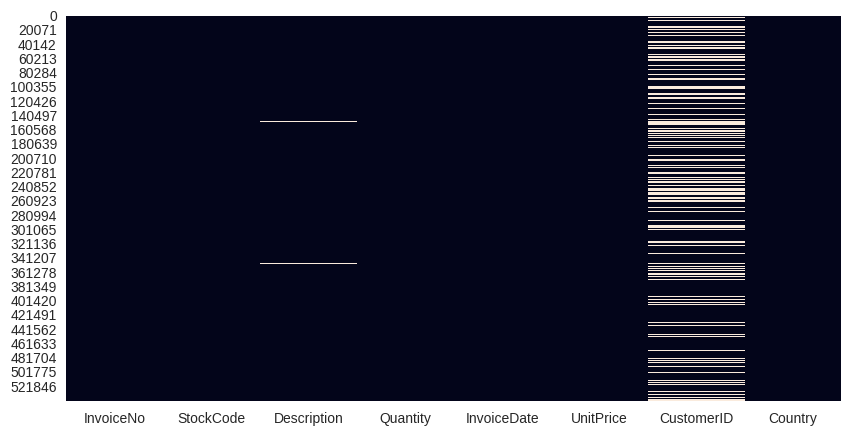

In [439]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

- The dataset has 541,909 rows and 8 columns.

- The columns are Invoice No, Stock Code, Description, Quantity, Invoice Date, Unit Price, Customer ID, and Country.

- The dataset contains both numerical and categorical data types.

- There are missing values in the Customer ID and Description columns. Specifically, there are 135,080 missing values in the Customer ID column and 1,454 missing values in the Description column.

- There are 5,268 duplicate values in the dataset.

- The Invoice Date column is stored as an object data type and would need to be converted to a datetime data type for time-series analysis.

- The Unit Price column is stored as a float data type, which suggests that the prices may contain decimals.

- The country column is stored as an object data type, which suggests that there may be multiple countries in the dataset.

- The missing values in the Customer ID column may indicate that some purchases were made by customers who did not provide their ID or were not registered.

- The missing values in the Description column may indicate that some products did not have a description or the description was not recorded properly.

## ***2. Understanding Your Variables***

In [440]:
# Dataset Columns

dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [441]:
# Dataset Describe

dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 



#### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantit**y: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [442]:
# Check Unique Values for each variable.

for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


In [443]:
# Check Unique countries name.

#creating a column list 
categorical_variables = ['Country']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {dataset[col].unique()}')

Unique values for Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [444]:
# Write your code to make your dataset analysis ready.
# Missing data counts and percentage
missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing Data Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


- Data with no customer assignment is of no use to us, because we can'y form clusters without customer ID.
- So we will be removing such rows from our dataset.

In [445]:
# Dropping the rows with nulls
dataset.dropna(subset=['CustomerID','Description'], inplace=True)

# New Shape
dataset.shape

(406829, 8)

In [446]:
# Checking duplicates

print(len(dataset[dataset.duplicated()]))

5225


In [447]:
# Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

# New Shape
dataset.shape

(401604, 8)

- Randomly assigning Customer IDs can make it difficult to track customer behavior over time, such as their purchase history, preferences, and interactions with the company. This can make it challenging to personalize the customer experience and provide targeted marketing and promotional campaigns.

In [448]:
# checking null counts and datatype in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [449]:
# Creating new features from the datetime column InvoiceDate

#creating features from the date for better data visualization

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate']) # converting from object to datetime format
dataset["year"]  = dataset["InvoiceDate"].apply(lambda x: x.year)
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month_name())
dataset['Day']   = dataset['InvoiceDate'].apply(lambda x: x.day_name())
dataset["hour"]  = dataset["InvoiceDate"].apply(lambda x: x.hour)

In [450]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
dataset['TotalAmount'] = dataset['Quantity']*dataset['UnitPrice']

In [451]:
dataset.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.3


### What all manipulations have you done and insights you found?

**Feature Manipulations**

- Missing values were removed from the CustomerID and Description columns, since the missing values were significant in number (135,080 and 1,454, respectively). This was likely done to avoid any potential biases or errors in the analysis.

- Duplicate values were removed from the dataset to ensure that each observation was unique and not counted multiple times. This was likely done to avoid any overestimation of the data.

- New features were created using the Invoice Date column. Specifically, new columns were created for year, month, day, and hour to allow for more granular analysis of the data over time. This was likely done to identify any trends or patterns in customer behavior or sales over time.

- A new feature called TotalAmount was created by multiplying the Quantity and UnitPrice columns. This was likely done to capture the total revenue generated by each transaction.



**Insights from dataset** - 

Based on the given information, here are some insights that can be derived:

- The Quantity column has a mean value of 9.55 and a standard deviation of 218.08, which indicates that the quantity of items purchased varies greatly across the dataset. The negative minimum value (-80,995) suggests that there may be some refunds or returns included in the dataset.

- The UnitPrice column has a mean value of 4.61 and a standard deviation of 96.76, which indicates that the prices of items purchased also vary greatly across the dataset. The negative minimum value (-11,062.06) suggests that there may be some refunds or returns included in the dataset.

- The CustomerID column has a mean value of 15,287.69 and a standard deviation of 1,713.60. This suggests that the majority of customers have an ID in the range of 13,574 to 16,002. However, there are missing values in this column, which indicates that some customers did not provide their ID or were not registered.

- The maximum value for the Quantity column is 80,995, while the maximum value for the UnitPrice column is 38,970. These values may indicate some outliers or errors in the data, and should be further investigated.

- The quartile ranges for the Quantity and UnitPrice columns suggest that most purchases were relatively small in quantity and price, with the majority of transactions having a quantity of 10 items or less and a unit price of 4.13 or less.

Overall, this information provides some basic statistics on the Quantity, UnitPrice, and CustomerID columns, which can help to understand the general characteristics of the data. However, further analysis and exploration is needed to gain more insights into the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Sales over an year.

   year  TotalAmount
1  2011  7726146.564
0  2010   552372.860


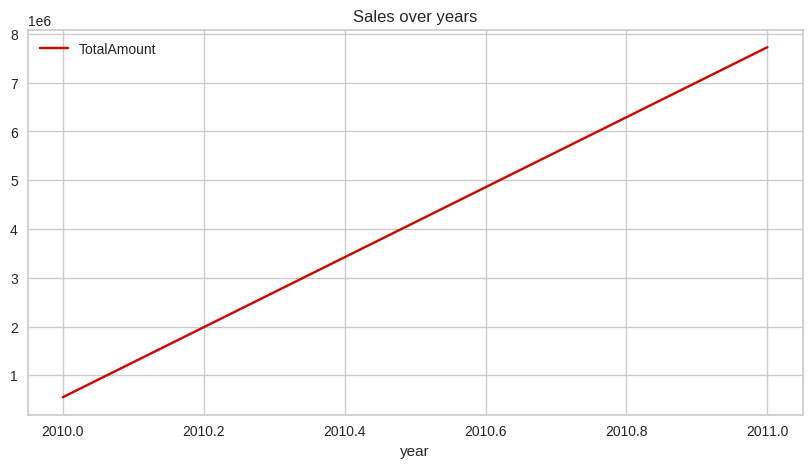

In [452]:
# Chart - 1 visualization code

#Sales trends over years
sales_over_years = dataset.groupby(['year'])['TotalAmount'].sum().reset_index() # grouping by year
sales_over_years = sales_over_years.sort_values(by = ['TotalAmount'], ascending = False) # soring data by sales in descending order
print(sales_over_years)

#Visualizing using line graph
dataset.groupby('year')["TotalAmount"].sum().plot.line(title='Sales over years',figsize=(10,5), legend=True,color='r') 
plt.show()

##### 1. Why did you pick the specific chart?

- We have used a line graph to visualize the sales trends over the years. A line graph is a suitable type of chart to visualize trends over time, where we can see how the values change over time.

##### 2. What is/are the insight(s) found from the chart?

- we can observe that the total sales amount has increased 14 times from the year 2010 to 2011. This indicates that there has been a significant increase in sales over the years, which can be due to various reasons like marketing strategies, increase in customer base, or introduction of new products

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The gained insights can help create a positive business impact as it shows that the company's sales are growing year by year. This can help the business to identify the successful strategies that have contributed to the growth and capitalize on them to further increase sales in the future. 

#### Chart - 2 - Monthly sales over the year.

        Month  TotalAmount
4     January   473731.900
3    February   435534.070
7       March   578576.210
0       April   425222.671
8         May   647011.670
6        June   606862.520
5        July   573112.321
1      August   615078.090
11  September   929356.232
10    October   973306.380
9    November  1126815.070
2    December   893912.290


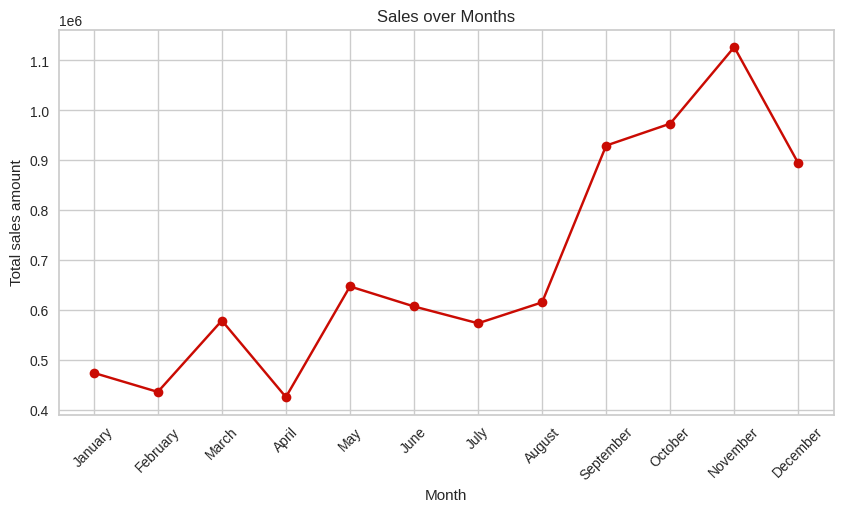

In [453]:
# Chart - 2 visualization code

# Define custom sort order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group sales by month and calculate total sales for each month
sales_month = dataset.groupby('Month')['TotalAmount'].sum().reset_index()

# Convert the 'Month' column to categorical data type with custom sort order
sales_month['Month'] = pd.Categorical(sales_month['Month'], categories=month_order, ordered=True)

# Sort the data by the 'Month' column
sales_month = sales_month.sort_values('Month')
print(sales_month)

#Visualize using line graph with markers
plt.figure(figsize=(10,5))
plt.plot(sales_month['Month'], sales_month['TotalAmount'], marker='o', color='r')
plt.title('Sales over Months')
plt.xlabel('Month')
plt.ylabel('Total sales amount')
plt.xticks(sales_month['Month'], rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

- Line graph is used to visualize the trend of sales over the months in a year. It helps in identifying the months where sales are high and low, and also helps in identifying the seasonality of the sales.

##### 2. What is/are the insight(s) found from the chart?

- From the chart, we can see that the sales tend to spike in the months of November and December, indicating a higher demand during the holiday season. There is also a noticeable dip in sales during the month of February, which could be due to a lull in demand after the holiday season. Overall, the chart gives us a good understanding of the seasonality of sales over the two-year period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights gained from the chart can help in forecasting sales for the upcoming years and in planning marketing and sales strategies accordingly. The business can focus on increasing the stock during the holiday season and promoting sales during other months to increase revenue. Overall, the insights gained from the chart can have a positive impact on the business.

#### Chart - 3 - Sales over different days of the week.

         Day  TotalAmount
1     Monday  1271078.601
4    Tuesday  1562715.681
5  Wednesday  1526440.000
3   Thursday  1902316.050
0     Friday  1238556.741
2     Sunday   777412.351


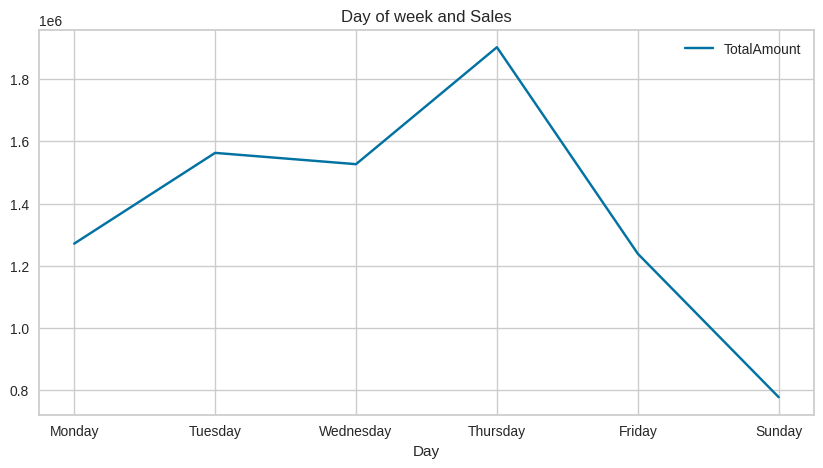

In [454]:
# Chart - 3 visualization code

# Define custom sort order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group sales by day of the week and calculate total sales for each day
all_week_sales = dataset.groupby(['Day'])['TotalAmount'].sum().reset_index()

# Convert the 'Day' column to categorical data type with custom sort order
all_week_sales['Day'] = pd.Categorical(all_week_sales['Day'], categories=day_order, ordered=True)

# Sort the data by the 'Day' column
all_week_sales = all_week_sales.sort_values('Day')
print(all_week_sales)

# Visualizing using line graph
all_week_sales.plot(x='Day', y='TotalAmount', kind='line', title='Day of week and Sales', figsize=(10,5), legend=True)
plt.show()

##### 1. Why did you pick the specific chart?

- Line graphs are commonly used to show trends over time or across categories. In this case, we are showing the trend of total sales for each day of the week.

##### 2. What is/are the insight(s) found from the chart?

- From the chart, we can see that Thursday has the highest total sales followed by Tuesday and Wednesday. Sunday has the lowest total sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- This insight can help businesses to schedule promotions and sales events on the days of the week when sales are typically higher. For example, a business can offer a promotion on Thursdays to attract more customers and increase sales.


#### Chart - 4 - Top 10 values for each variable.

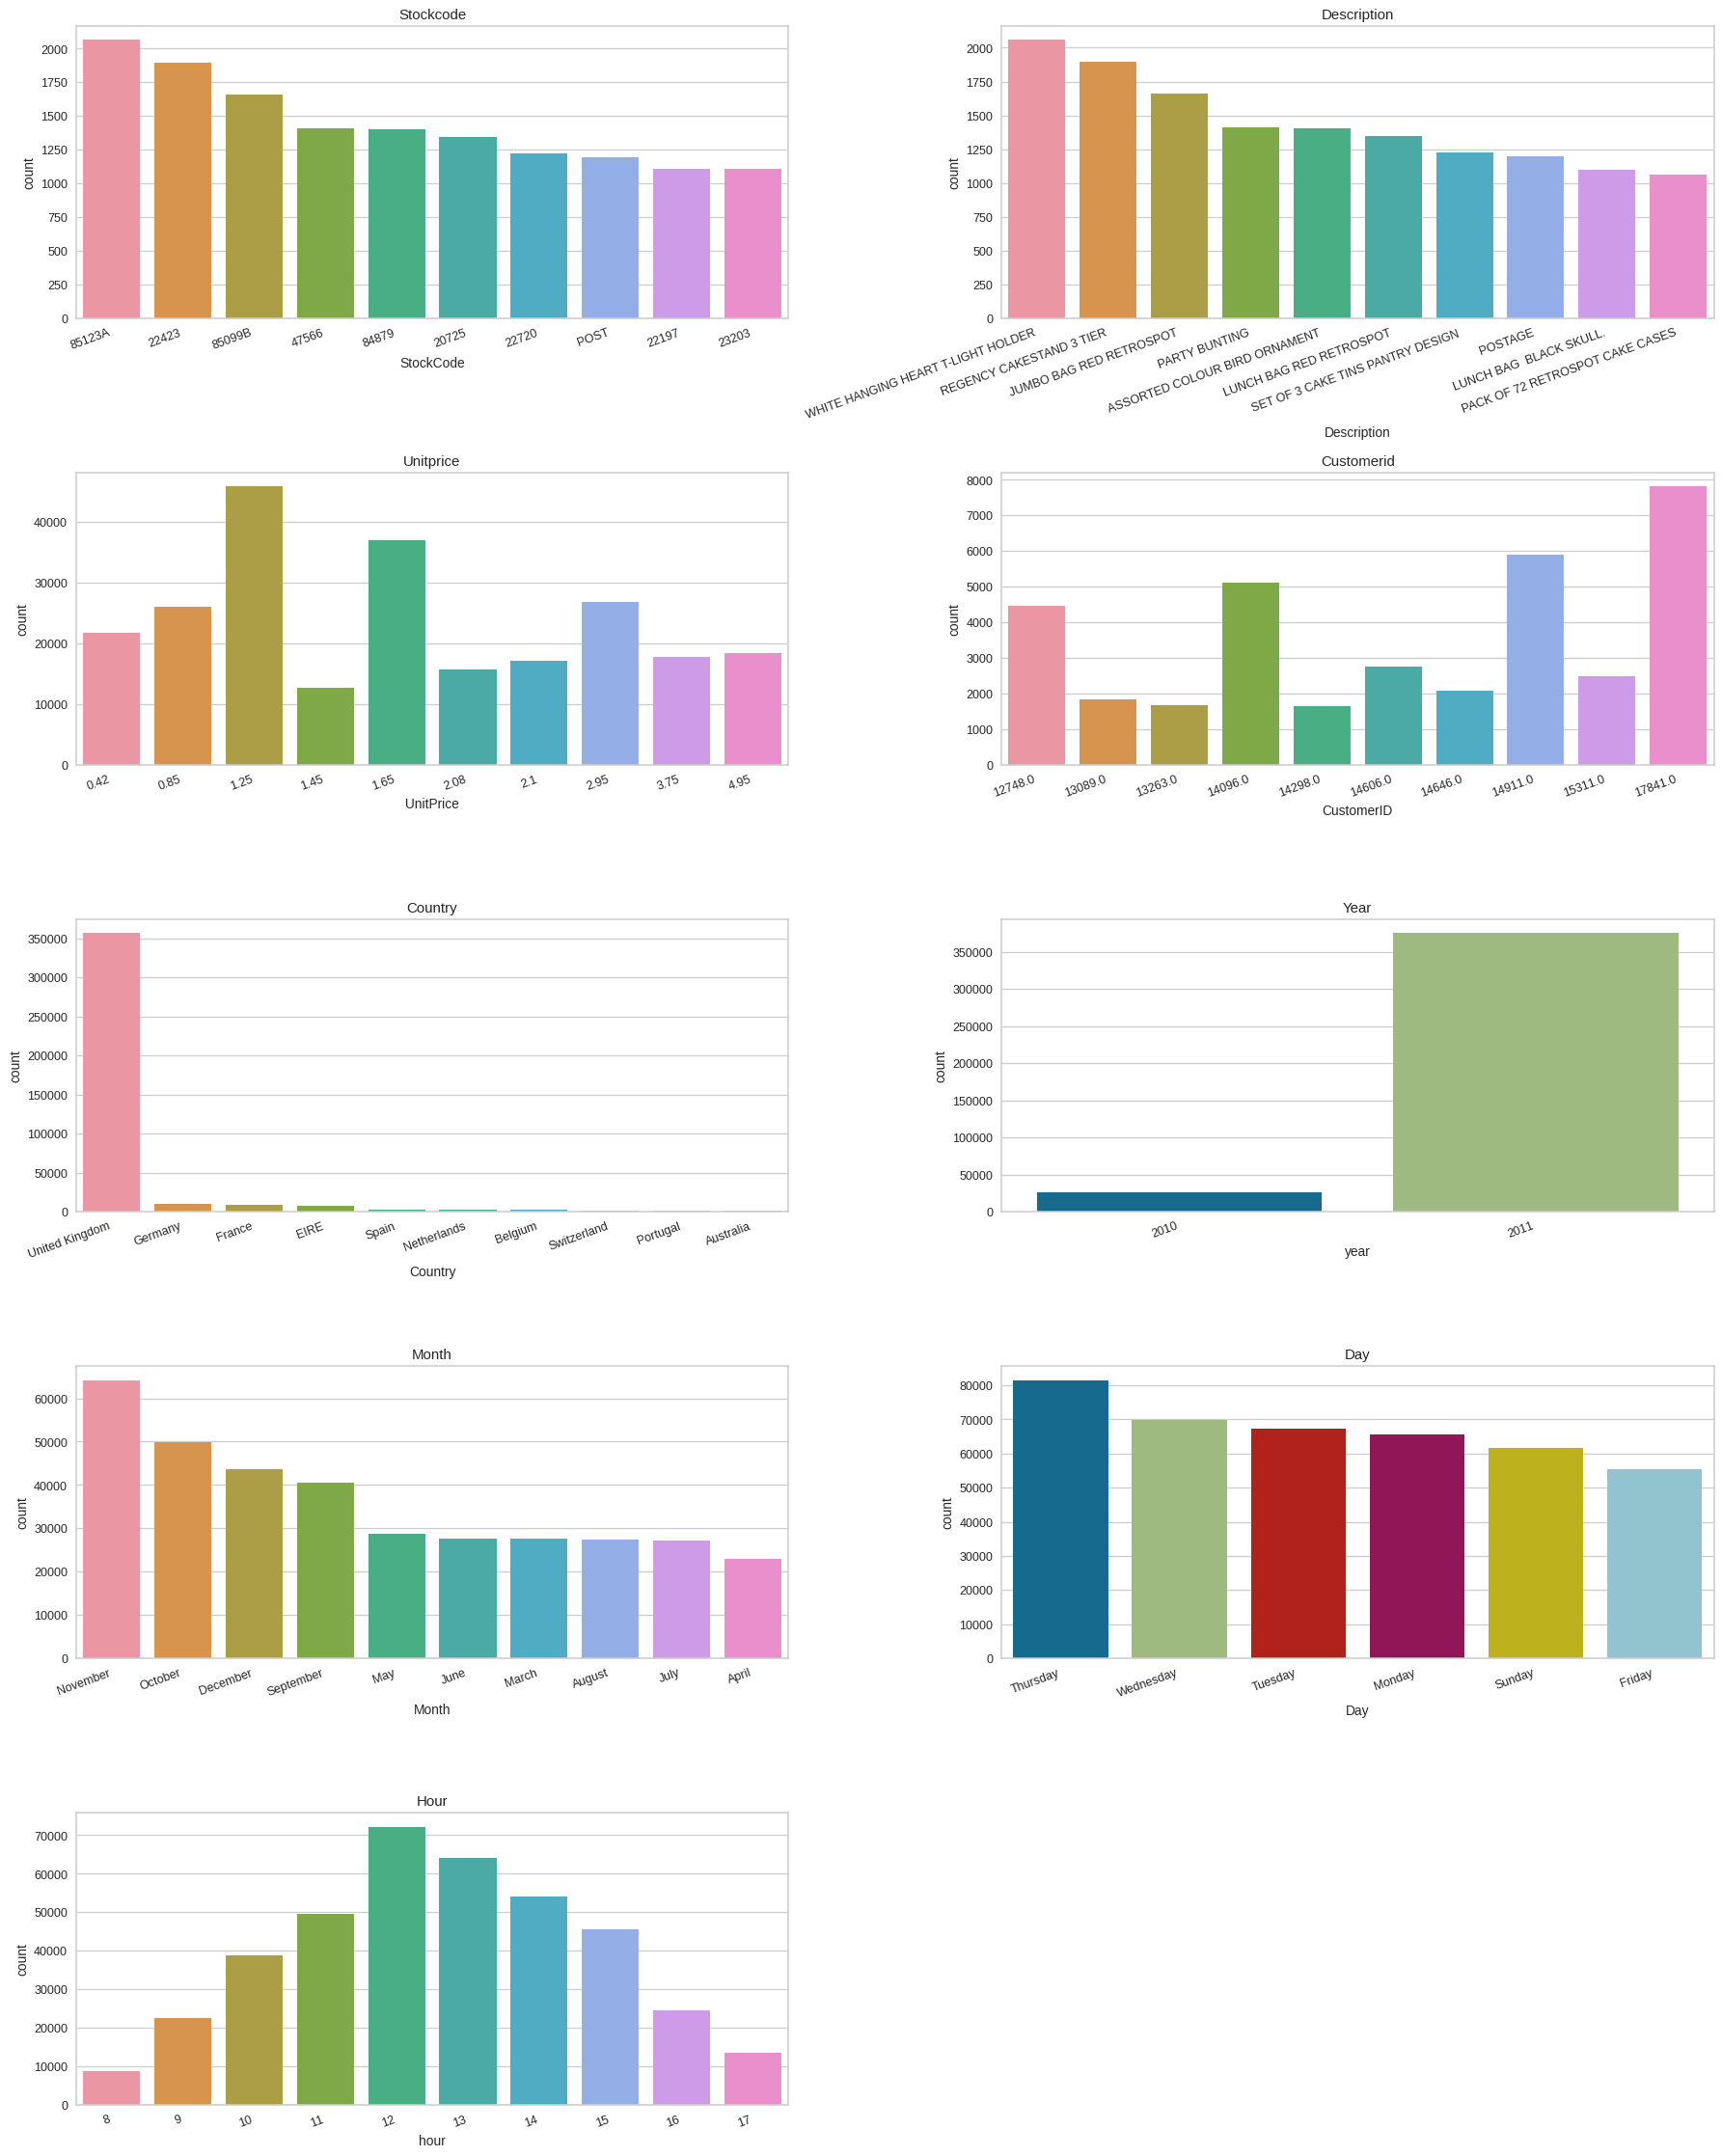

In [455]:
# Chart - 4 visualization code

# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = dataset[col].value_counts().reset_index().head(10)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain.
- There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
- Most of the customers have purchased the products in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon timings.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We know which countaries, products and timings people prefer.Retailer can take advantage of these information for creating positive impact for their business.

#### Chart - 5 - Countaries with highest sales.

           Country  TotalAmount
35  United Kingdom  6747156.154
23     Netherlands   284661.540
10            EIRE   250001.780
14         Germany   221509.470
13          France   196626.050
5           Others   578564.430


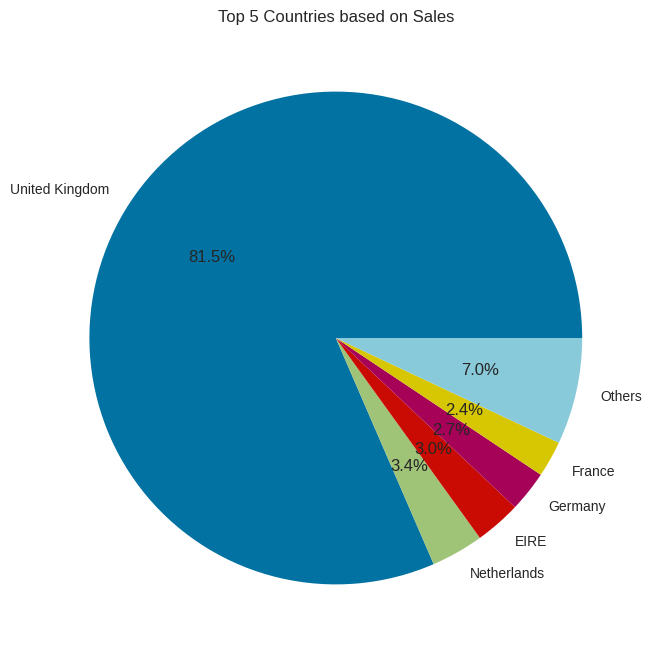

In [456]:
# Chart - 5 visualization code

# Most sales from top 5 countries

country_sales = dataset.groupby("Country").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
top_5_countries = country_sales.head(5)
top_5_sales = top_5_countries['TotalAmount'].sum()
top_5_countries.loc[5] = ['Others', country_sales['TotalAmount'].sum() - top_5_sales]
print(top_5_countries)

# Visualizing top 5 countries based on total sales
plt.figure(figsize=(10,8))
plt.title("Top 5 Countries based on Sales")
plt.pie(top_5_countries['TotalAmount'], labels=top_5_countries['Country'], autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

- The chart used here is a pie chart, which is a circular chart divided into slices to represent data. In this case, it is used to show the percentage of total sales contributed by the top 5 countries and "Others" category.

##### 2. What is/are the insight(s) found from the chart?

- The insights gained from the chart are that the United Kingdom is the top contributor to sales with 81.5% followed by the Netherlands with 3.4%, EIRE with 3.0%, Germany with 2.7%, and France with 2.4%. The remaining countries contribute to 7% of the total sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- These insights can help businesses understand which countries are the biggest contributors to their sales and focus their marketing and sales efforts on those countries. They can also help businesses identify potential growth opportunities in countries that are not currently in the top 5 but have potential for growth. Overall, this can lead to a positive business impact by improving sales and profitability.

#### Chart - 6 - Countaries with least sales.

           Country  Sales_Count
28    Saudi Arabia       131.17
2          Bahrain       548.40
8   Czech Republic       707.72
27             RSA      1002.31
4           Brazil      1143.60


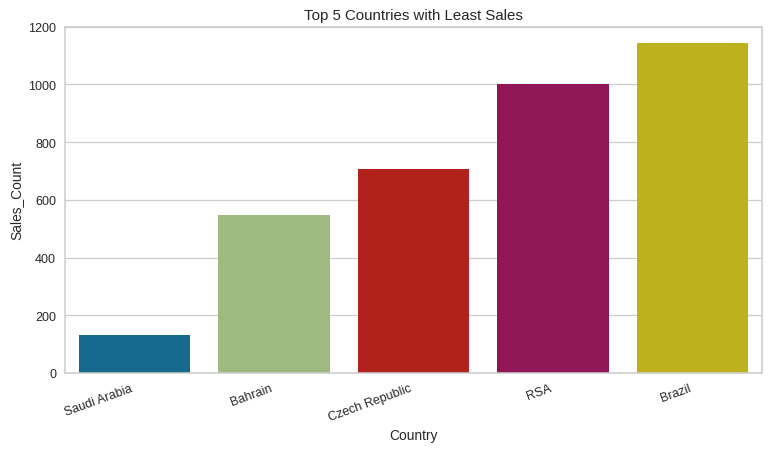

In [457]:
# Chart - 6 visualization code

# Least sales from these countries
country_sales = dataset.groupby("Country").sum()["TotalAmount"].reset_index().sort_values("TotalAmount", ascending=True).head(5)
country_sales.rename(columns={'TotalAmount': 'Sales_Count'}, inplace=True)
print(country_sales)

# Visualizing top countries based on total sales 
plt.figure(figsize=(10, 5), dpi=90)
plt.xticks(rotation=20, ha='right')
plt.title("Top 5 Countries with Least Sales")
sns.barplot(data=country_sales, x="Country", y="Sales_Count")
plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of best ways to show segments of information.Bar graph was used because it is effective in comparing the sales values of different categories

##### 2. What is/are the insight(s) found from the chart?

- The graph shows that Saudi Arabia has the least sales count among all the countries in the dataset, followed by Bahrain, Czech Republic, RSA, and Brazil.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- From this chart, we can see the countries that need more attention in terms of sales and marketing strategies to improve their performance. Focusing on these countries may help the business increase its revenue and expand its customer base. Hence, the insights gained from this chart can potentially have a positive business impact.

#### Chart - 7 - Countaries with highest order quantity.

        Country    Quantity
23  Netherlands   84.406580
31       Sweden   77.292842
19        Japan   70.441341
0     Australia   66.488871
29    Singapore   22.855895
5        Others  399.463313


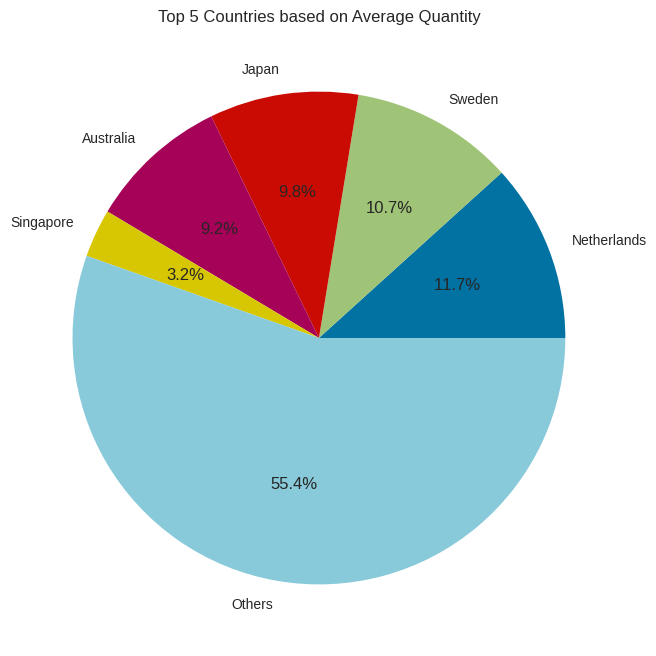

In [458]:
# Chart - 7 visualization code

# Countrywise average item purchases
country_quantity = dataset.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
top_5_countries = country_quantity.head(5)
top_5_quantity = top_5_countries['Quantity'].sum()
top_5_countries.loc[5] = ['Others', country_quantity['Quantity'].sum() - top_5_quantity]
print(top_5_countries)

# Visualizing top countries based on average item purchases 
plt.figure(figsize=(10,8))
plt.title("Top 5 Countries based on Average Quantity")
plt.pie(top_5_countries['Quantity'], labels=top_5_countries['Country'], autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart is a suitable choice in this case because it helps to visualize the proportion of each category in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

- From the chart, we can see that the Netherlands has the highest average item purchases, followed by Sweden, Japan, Australia, and Singapore. The "Others" category has a relatively low average quantity compared to the top 5 countries. - Therefore, the chart provides insights into the countries where the business can potentially focus its efforts to increase B2B sales as they are doing most of bulk ordering.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The gained insights can potentially help create a positive business impact by informing the business on where to focus its resources and marketing efforts to increase sales. For example, if the business has been neglecting the Netherlands market, the chart indicates that it might be a good idea to invest more in marketing and sales in that region.

#### Chart - 8 - Product with High quantity orders.

                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
1771             JUMBO BAG RED RETROSPOT     44963
217        ASSORTED COLOUR BIRD ORNAMENT     35215
3716  WHITE HANGING HEART T-LIGHT HOLDER     34128
2279     PACK OF 72 RETROSPOT CAKE CASES     33386


<Axes: title={'center': 'Product with High quantity orders'}, xlabel='Description', ylabel='Quantity'>

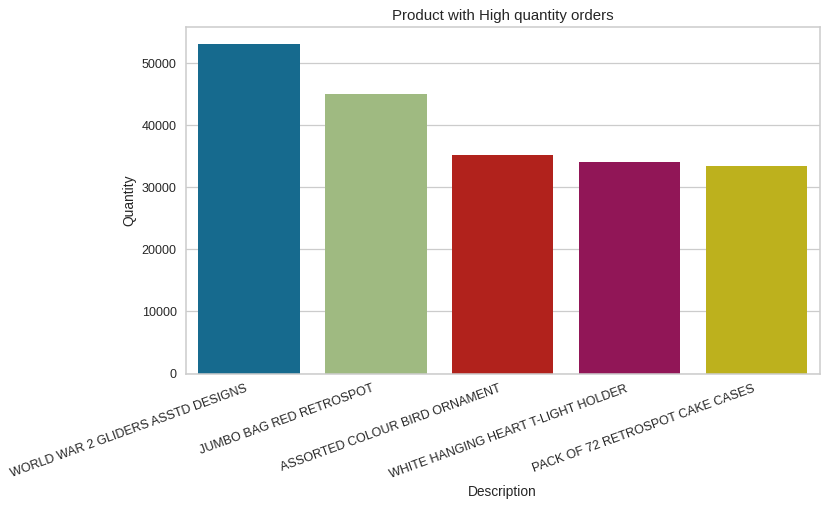

In [459]:
# Chart - 8 visualization code

# quantity wise item purchases
product_quantity = dataset.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False).head(5)
print(product_quantity)

# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity,x="Description",y="Quantity")

##### 1. Why did you pick the specific chart?

- We used a bar plot in this visualization because it is a good way to compare the quantity of different products.

##### 2. What is/are the insight(s) found from the chart?

- Decoration products and jewellery items are mostly ordered in bulk quantity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights gained from this chart are that these top 5 products are very popular and have high purchase quantities, which indicates that they are in high demand among customers. This information can be useful for the business to focus on these popular products and ensure they are always in stock to meet customer demand. Additionally, the business can explore ways to promote these products to potentially increase their sales even further.

#### Chart - 9 - Product that made most of the revenue.

                             Description  TotalAmount
2780            REGENCY CAKESTAND 3 TIER    132567.70
3716  WHITE HANGING HEART T-LIGHT HOLDER     93767.80
1771             JUMBO BAG RED RETROSPOT     83056.52
2355                       PARTY BUNTING     67628.43
2624                             POSTAGE     66710.24


<Axes: title={'center': 'Product that made most of the revenue'}, xlabel='Description', ylabel='TotalAmount'>

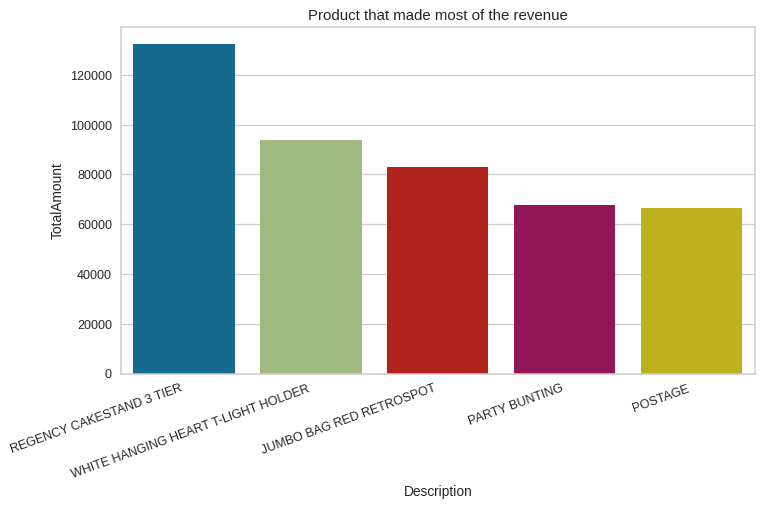

In [460]:
# Chart - 9 visualization code

# Amount wise item purchases
product_price = dataset.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False).head(5)
print(product_price)

# Visualizing top products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price,x="Description",y="TotalAmount")

##### 1. Why did you pick the specific chart?

- We have used a bar plot to visualize the top products based on the amount of revenue they have generated.

##### 2. What is/are the insight(s) found from the chart?

- The "Regency Cakestand 3 Tier" is the top-selling product in terms of generating the most revenue, followed by "White Hanging Heart T-Light Holder" and "Jumbo Bag Red Retrospot".
- "Postage" is also one of the top-selling products in terms of generating revenue, which indicates that shipping and handling costs are an important part of the business.
- The top-selling products based on revenue are different from the top-selling products based on quantity. This indicates that the business should focus not only on selling more products but also on selling high-value products to increase revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The gained insights can definitely help in creating a positive business impact by providing valuable information on the products that are generating the most revenue. The business can use this information to make informed decisions about inventory management, product pricing, and marketing strategies to increase revenue and profitability.

#### Chart - 10 - Product with large customer base.

                             Description  Customer_Count
2780            REGENCY CAKESTAND 3 TIER             887
3716  WHITE HANGING HEART T-LIGHT HOLDER             858
2355                       PARTY BUNTING             708
217        ASSORTED COLOUR BIRD ORNAMENT             679
3014   SET OF 3 CAKE TINS PANTRY DESIGN              640


<Axes: title={'center': 'Product with large customer base'}, xlabel='Description', ylabel='Customer_Count'>

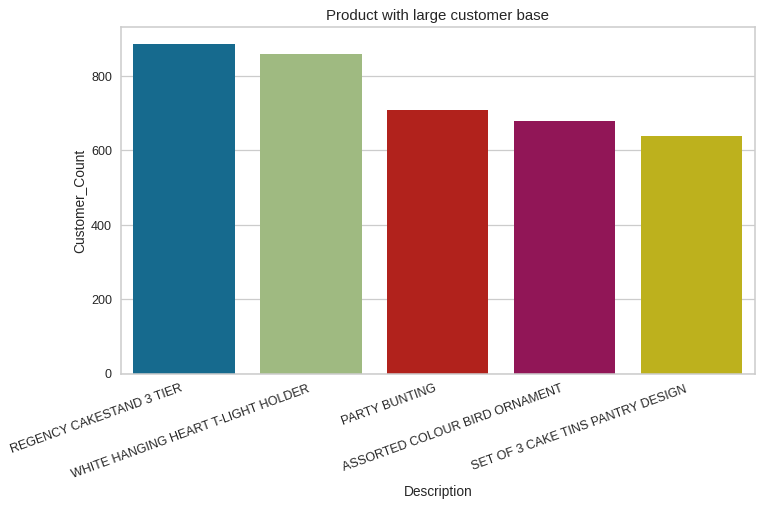

In [461]:
# Chart - 10 visualization code

# customer wise item purchases
product_customer = dataset.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False).head(5)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
print(product_customer)

# Visualizing top products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer,x="Description",y="Customer_Count")

##### 1. Why did you pick the specific chart?

- We have used a bar plot to visualize the top products based on the number of customers who have purchased them. The bar plot effectively compares the customer count of each product in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

- Products related to patries and decoration are more in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the top products with a large customer base can help the business in several ways, such as:

- These products could be marketed more to increase their sales and revenue.
- The business could develop new products similar to these popular items to attract more customers.
- The business could focus on improving the quality of these popular products to maintain and grow their customer base.

#### Chart - 11 - Customer with High cancellations.

There are 8872 transactions for the returns
      CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101


<Axes: title={'center': 'customer with High cancellations'}, xlabel='CustomerID', ylabel='Cancellations'>

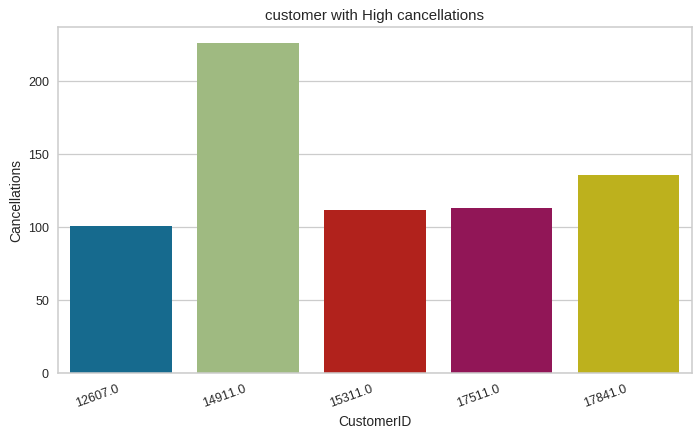

In [462]:
# Chart - 11 visualization code

# Sales less than 0 represents cancellation or return
cancellations = dataset[dataset['Quantity'] < 0]
print(f'There are {len(cancellations)} transactions for the returns')

# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False).head(5)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
print(customer_cancellations)

# Visualizing top customers based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations,x="CustomerID",y="Cancellations")


##### 1. Why did you pick the specific chart?

- We have used a bar plot to visualize the top customers based on cancellations. The bar plot is useful for comparing the number of cancellations by different customers.

##### 2. What is/are the insight(s) found from the chart?

- From the chart, we can see that the customer with ID 14911.0 has the highest number of cancellations, followed by customers with IDs 17841.0, 17511.0, 15311.0, and 12607.0.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The insight gained from the chart is that some customers have a higher tendency to cancel or return their purchases than others. This can help the business identify these customers and investigate the reasons for their cancellations. It can also help the business to better manage their inventory and avoid stockouts by having a more accurate estimation of demand.

Overall, the gained insights could potentially have a positive business impact by improving customer satisfaction and reducing costs associated with cancellations and returns.

#### Chart - 12 - Customer with Highest order quantity

      CustomerID  order quantity
4042     17841.0            7812
1895     14911.0            5898
1300     14096.0            5128
330      12748.0            4459
1674     14606.0            2759


<Axes: title={'center': 'customer with Highest order quantity'}, xlabel='CustomerID', ylabel='order quantity'>

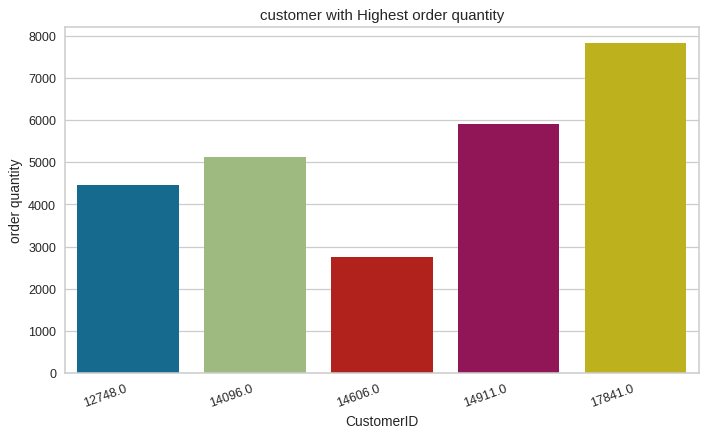

In [463]:
# Checking the number of orders by each customer. 
customer_orders = dataset.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False).head(5)
customer_orders.rename(columns={'InvoiceNo': 'order quantity'}, inplace=True)
print(customer_orders)

# Visualizing top customers based on orders 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with Highest order quantity")
sns.barplot(data=customer_orders,x="CustomerID",y="order quantity")

##### 1. Why did you pick the specific chart?

- We have used a bar plot to visualize the number of orders made by each customer. The bar plot is useful in this scenario as it displays the order quantity for each customer in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

- The insight gained from the chart is that the top 5 customers with the highest order quantity have placed significantly more orders than other customers. This information is helpful in identifying the top customers who are contributing to the majority of sales and can help the business to focus on retaining these customers by providing better service, personalized offers, or other incentives to maintain their loyalty.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Overall, the insights gained from this chart can have a positive business impact by enabling the business to target its resources and efforts towards retaining its most valuable customers.

#### Chart - 13 - Products with High cancellations

                   Description  Cancellations
1380  REGENCY CAKESTAND 3 TIER            180
1078                    Manual            175
1288                   POSTAGE             97
875   JAM MAKING SET WITH JARS             86
530                   Discount             77


<Axes: title={'center': 'Products with High cancellations'}, xlabel='Description', ylabel='Cancellations'>

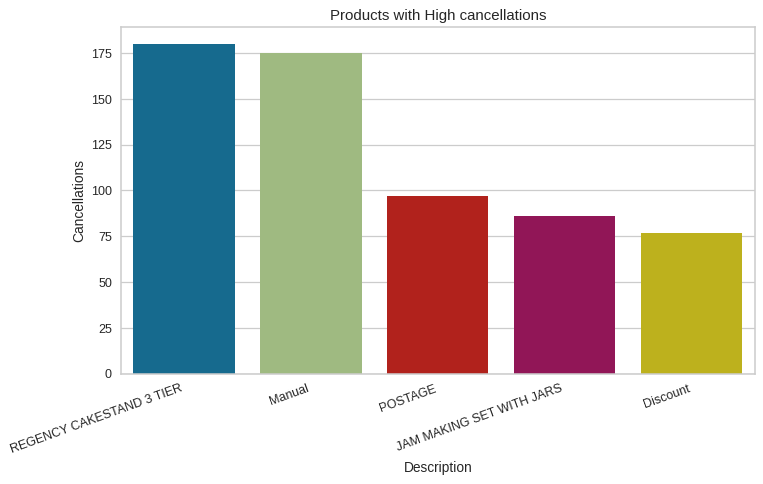

In [464]:
# Chart - 13 visualization code

# Checking the number of cancellations product wise. 
product_cancellations = cancellations.groupby('Description').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False).head(5)
product_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
print(product_cancellations)

# Visualizing top countries based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Products with High cancellations")
sns.barplot(data=product_cancellations,x="Description",y="Cancellations")

##### 1. Why did you pick the specific chart?

- We have used a bar plot to visualize the top products with the highest number of cancellations. The bar plot is an effective way to compare the number of cancellations between different products.

##### 2. What is/are the insight(s) found from the chart?

- Regency cakestand,jam making set, discounted products have higher chance of getting returned.
- There could be many reasons why customers are returning or cancelling products, such as a defect in the product or a mismatch in customer expectations. It would be necessary to investigate further and gather more data to determine the exact cause of the cancellations or returns.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


- These insights can help the business to identify which products are more likely to be canceled or returned by customers. By analyzing the reasons for cancellations and taking necessary actions, the business can improve its customer satisfaction and reduce the number of returns. It can also help to adjust the inventory levels and plan the procurement accordingly to minimize the potential loss due to cancellations.

#### Chart - 14 - Correlation Heatmap

<Axes: >

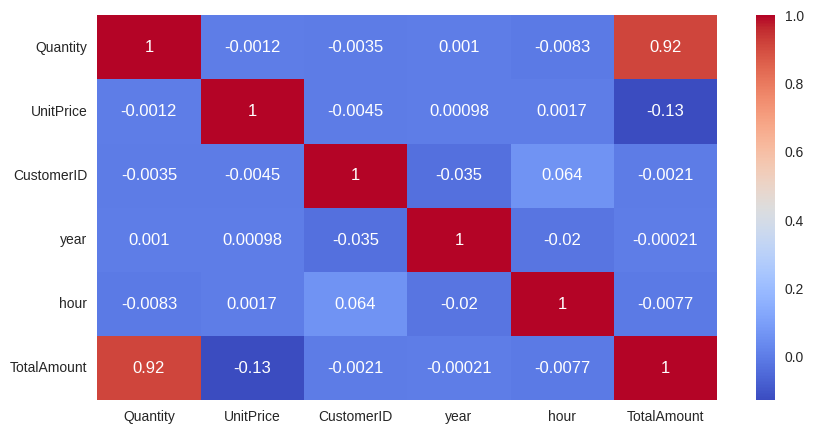

In [465]:
#Checking relation between  features using correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True)


##### 1. Why did you pick the specific chart?

Correlation heatmaps is used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots helps to identify outliers and to detect linear and nonlinear relationships as well.

##### 2. What is/are the insight(s) found from the chart?

- From basic observation, if we leave the variables which we created for data visualization, there is no major multicollinarity associated which needs to be corrected for now.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:
- Null hypothesis: There is no significant difference in the total amount spent by customers in different countries.
- Alternative hypothesis: There is a significant difference in the total amount spent by customers in different countries.

#### 2. Perform an appropriate statistical test.

In [466]:
import scipy.stats as stats

# Perform one-way ANOVA
result = stats.f_oneway(*[group["TotalAmount"] for name, group in dataset.groupby("Country")])

# Print F-statistic and p-value
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

# Interpret result
if result.pvalue < 0.05:
    print("We reject the null hypothesis and accept the alternative hypothesis. There is a significant difference in the total amount spent by customers in different countries.")
else:
    print("We accept null hypothesis and reject alternate hypothesis. There is no significant difference in the total amount spent by customers in different countries.")

F-statistic: 6.06462986919369
p-value: 5.875899913253756e-28
We reject the null hypothesis and accept the alternative hypothesis. There is a significant difference in the total amount spent by customers in different countries.


- In this case, the obtained F-statistic is 6.06, which indicates that there is some difference in the means of the total amount spent by customers in different countries.
- The p-value is 5.88e-28, which is very small (much less than the commonly used threshold of 0.05), indicating that this difference is unlikely to be due to chance alone. 
Therefore, we can reject the null hypothesis that there is no significant difference in the total amount spent by customers in different countries, and accept the alternative hypothesis that there is a significant difference.

##### Which statistical test have you done to obtain P-Value?

-  We have used the one-way ANOVA (Analysis of Variance) statistical test to compare the mean total amount spent by customers in different countries.

##### Why did you choose the specific statistical test?

- We chose ANOVA because we are interested in comparing the means of multiple groups (countries) at once, and ANOVA is an appropriate statistical test for this purpose.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:
- Null hypothesis: There is no difference in the average quantity of items purchased by customers from different countries.
- Alternative hypothesis: There is a significant difference in the average quantity of items purchased by customers from different countries.

#### 2. Perform an appropriate statistical test.

In [467]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
import scipy.stats as stats

# Perform one-way ANOVA
result = stats.f_oneway(*[group["Quantity"] for name, group in dataset.groupby("Country")])

# Print F-statistic and p-value
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)


# Interpret result
if result.pvalue < 0.05:
    print("We reject the null hypothesis and accept the alternative hypothesis. There is a significant difference in the average quantity of items purchased by customers from different countries.")
else:
    print("We accept null hypothesis and reject alternate hypothesis. There is no significant difference in the average quantity of items purchased by customers from different countries.")


F-statistic: 8.901046668532672
p-value: 2.6148838519883325e-47
We reject the null hypothesis and accept the alternative hypothesis. There is a significant difference in the average quantity of items purchased by customers from different countries.


##### Which statistical test have you done to obtain P-Value?


- The F-statistic is a test statistic used in ANOVA to determine if there is a significant difference between the means of the groups being compared.

 **A larger F-statistic indicates a larger difference between the means of the groups. In our case, the F-statistic is 8.901**.

- The p-value is a measure of the evidence against the null hypothesis. A small p-value indicates strong evidence against the null hypothesis, suggesting that there is a significant difference between the means of the groups being compared. In contrast, a large p-value indicates weak evidence against the null hypothesis, suggesting that there is not a significant difference. 

  **In yourour case, the p-value is 2.615e-47, which is very small (much less than 0.05), indicating strong evidence against the null hypothesis.**

Therefore, based on the obtained F-statistic and p-value, we can reject the null hypothesis and conclude that there is a significant difference in the average quantity of items purchased by customers from different countries.

##### Why did you choose the specific statistical test?

- We have used the **one-way ANOVA (Analysis of Variance) statistical test** to compare the mean quantity of items purchased by customers from different countries.
- We chose ANOVA because we are interested in comparing the means of multiple groups (countries) at once, and ANOVA is an appropriate statistical test for this purpose. 

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:
- Null Hypothesis (H0): The mean total amount spent by customers in country A is equal to the mean total amount spent by customers in country B.
- Alternative Hypothesis (HA): The mean total amount spent by customers in country A is not equal to the mean total amount spent by customers in country B.

#### 2. Perform an appropriate statistical test.

In [468]:
# Create two groups
group1 = dataset[dataset["Country"] == "United Kingdom"]["TotalAmount"]
group2 = dataset[dataset["Country"] == "France"]["TotalAmount"]

# Perform two-sample t-test
result = stats.ttest_ind(group1, group2)

# Interpret result
if result.pvalue < 0.05:
    print("We reject the null hypothesis and accept the alternative hypothesis. The mean total amount spent by customers in United Kingdom is different from the mean total amount spent by customers in France.")
else:
    print("We accept null hypothesis and reject alternate hypothesis. The mean total amount spent by customers in United Kingdom is equal to the mean total amount spent by customers in France.")
    
# Print t-statistic and p-value
print("t-statistic:", result.statistic)
print("p-value:", result.pvalue)

We accept null hypothesis and reject alternate hypothesis. The mean total amount spent by customers in United Kingdom is equal to the mean total amount spent by customers in France.
t-statistic: -0.8663370077387037
p-value: 0.38630594638228877


- A negative t-statistic indicates that the mean total amount spent by customers in the United Kingdom is lower than the mean total amount spent by customers in France.
- However in this case, the p-value is greater than 0.05, indicating that we do not have sufficient evidence to reject the null hypothesis, and we cannot conclude that there is a significant difference between the means of the two groups.

##### Which statistical test have you done to obtain P-Value?

- The statistical test used in this code is a two-sample t-test. We use this test to determine if there is a significant difference between the means of two independent groups.

##### Why did you choose the specific statistical test?

- We chose this test because we want to compare the mean total amount spent by customers in two different countries. The t-test is appropriate for this situation since we are comparing the means of two independent groups and assuming that the data is normally distributed. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

- We had missing values in customer id and description.
- Randomly assigning Customer IDs can make it difficult to track customer behavior over time, such as their purchase history, preferences, and interactions with the company. This can make it challenging to personalize the customer experience and provide targeted marketing and promotional campaigns.
- This is why though we had aroud 25% missing values, but instead of imputing based on business goal it was better to remove them for now.

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [469]:
# Manipulate Features to minimize feature correlation and create new features

# InvoiceNo starting with 'C' represents cancellation
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')
cancellations = dataset[dataset['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,hour,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96


In [470]:
# Dropping cancellations from the main dataframe
df = dataset[~dataset['InvoiceNo'].str.contains('C')]

- When analyzing customer behavior, it is important to focus on the customers who have made purchases and are likely to make future purchases, rather than those who have returned or cancelled their orders.
- Additionally, including data from returned or cancelled orders could skew the analysis by including customers who may not be interested in the products or services offered by the business or may have had a negative experience with their previous purchase.

#### 2. Feature Selection

In [471]:
# Select your features wisely to avoid overfitting

# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [472]:
# Calculate RFM values for each customer
recency = rfm['Recency']
frequency = rfm['Frequency']
monetary = rfm['Monetary']

# Calculate the quartiles for each RFM value
r_quartiles = pd.qcut(recency, q=4, labels=range(4, 0, -1))
f_quartiles = pd.qcut(frequency, q=4, labels=range(1, 5))
m_quartiles = pd.qcut(monetary, q=4, labels=range(1, 5))

# Combine the RFM values into a single dataframe
rfm_rfm = pd.concat([r_quartiles, f_quartiles, m_quartiles], axis=1)
rfm_rfm.columns = ['R', 'F', 'M']

# Convert the RFM values to numeric data types
rfm_rfm['R'] = pd.to_numeric(rfm_rfm['R'])
rfm_rfm['F'] = pd.to_numeric(rfm_rfm['F'])
rfm_rfm['M'] = pd.to_numeric(rfm_rfm['M'])

# Calculate the RFM score for each customer
rfm_rfm['RFM_score'] = rfm_rfm['R'] * 100 + rfm_rfm['F'] * 10 + rfm_rfm['M']

# Create customer segmentation groups based on RFM score
def Customer_Segment(rfm):
    if rfm['RFM_score'] >= 311:
        return 'High-Value Customer'
    elif (rfm['RFM_score'] >= 211) and (rfm['RFM_score'] <= 310):
        return 'Medium-Value Customer'
    else:
        return 'Low-Value Customer'

rfm['Customer_Segment'] = rfm_rfm.apply(Customer_Segment, axis=1)

# Output the results
rfm.sample(10)


,Recency,Frequency,Monetary,Customer_Segment
CustomerID,,,,
15985.0,123,37,1142.42,Medium-Value Customer
18274.0,30,11,175.92,High-Value Customer
14583.0,6,302,986.96,High-Value Customer
17499.0,290,40,622.88,Low-Value Customer
17897.0,173,108,541.81,Low-Value Customer
16893.0,367,45,145.93,Low-Value Customer
16131.0,52,78,3506.54,Medium-Value Customer
14850.0,312,21,325.75,Low-Value Customer
14759.0,5,102,1625.97,High-Value Customer


##### What all feature selection methods have you used  and why?

- In the given scenario, the reason for removing the original features and adding the new features is not related to any specific feature selection method. Instead, it is based on domain knowledge and understanding of the problem, as well as the availability and quality of the data. 
- The new columns of customer ID, recency, frequency, and monetary may have been added as they are more relevant and informative for customer segmentation and analysis than the original features.

##### Which all features you found important and why?

**Features which we removed** - 

- **Invoice No, Stock Code, Description, Quantity, Invoice Date, Unit Price, and Country**:

 These columns contain transactional details that are not directly related to customer behavior. In other words, they provide information about what customers purchased and when, but not about how often or how much they spent. Therefore, they are less useful for customer segmentation.

**Selected Features** - 

- **Customer ID**: This column is still relevant as it identifies individual customers. However, it is not sufficient for customer segmentation because it does not provide any information about their behavior.

- **Recency**: This new column indicates how recently a customer made a purchase. It is a useful metric for identifying customers who are more likely to make another purchase soon, as well as those who may have lost interest in the company's products.

- **Frequency**: This new column indicates how often a customer makes a purchase. It is a useful metric for identifying loyal customers who are more likely to make repeat purchases.

- **Monetary**: This new column indicates how much a customer spent on purchases. It is a useful metric for identifying high-value customers who are worth more to the company in terms of revenue.

### 3. Handling Outliers

Text(0.5, 0, 'Attributes')

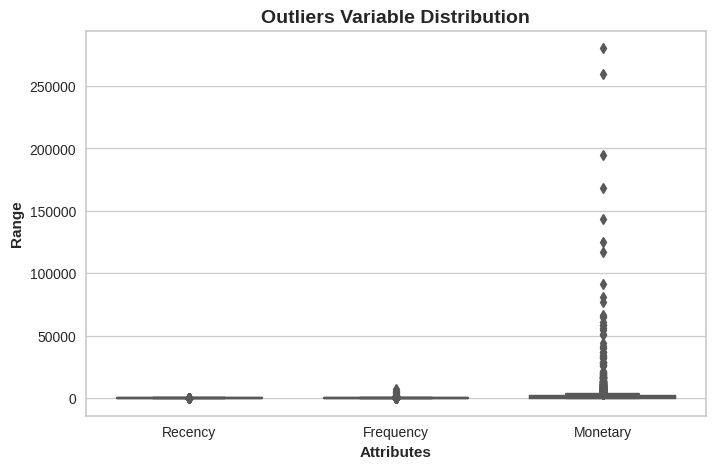

In [473]:
# Handling Outliers & Outlier treatments

# Outlier Analysis of Recency Frequency and Monetary

attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [474]:
# Removing (statistical) outliers for Monetary
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

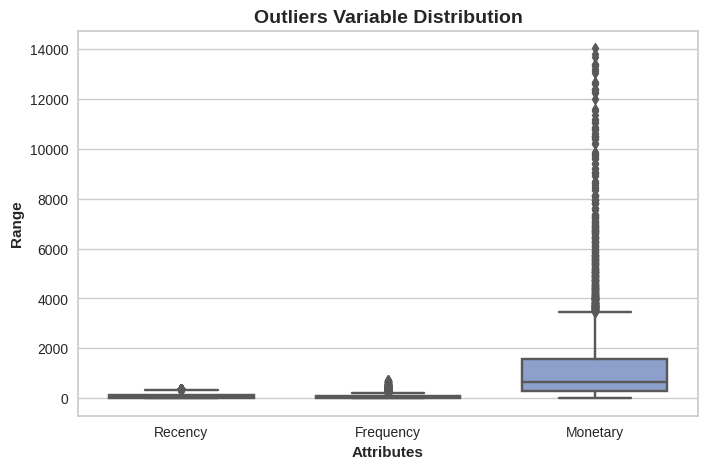

In [475]:
attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

##### What all outlier treatment techniques have you used and why did you use those techniques?

 - The **IQR method** is useful for removing outliers because it is robust to extreme values and does not make assumptions about the distribution of the data. This method can be particularly useful for data that is not normally distributed or has a high degree of skewness.
 - By applying the IQR method to the data, we can identify and remove data points that are likely to be outliers and may negatively impact the results of the analysis. This can help to improve the accuracy and reliability of our clustering algorithms.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [476]:
# Transform Your data

# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,Customer_Segment,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,
12347.0,2,182,4310.00,High-Value Customer,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,Medium-Value Customer,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,High-Value Customer,2.944439,4.290459,7.471676
12350.0,310,17,334.40,Low-Value Customer,5.736572,2.833213,5.812338
12352.0,36,85,2506.04,High-Value Customer,3.583519,4.442651,7.826459


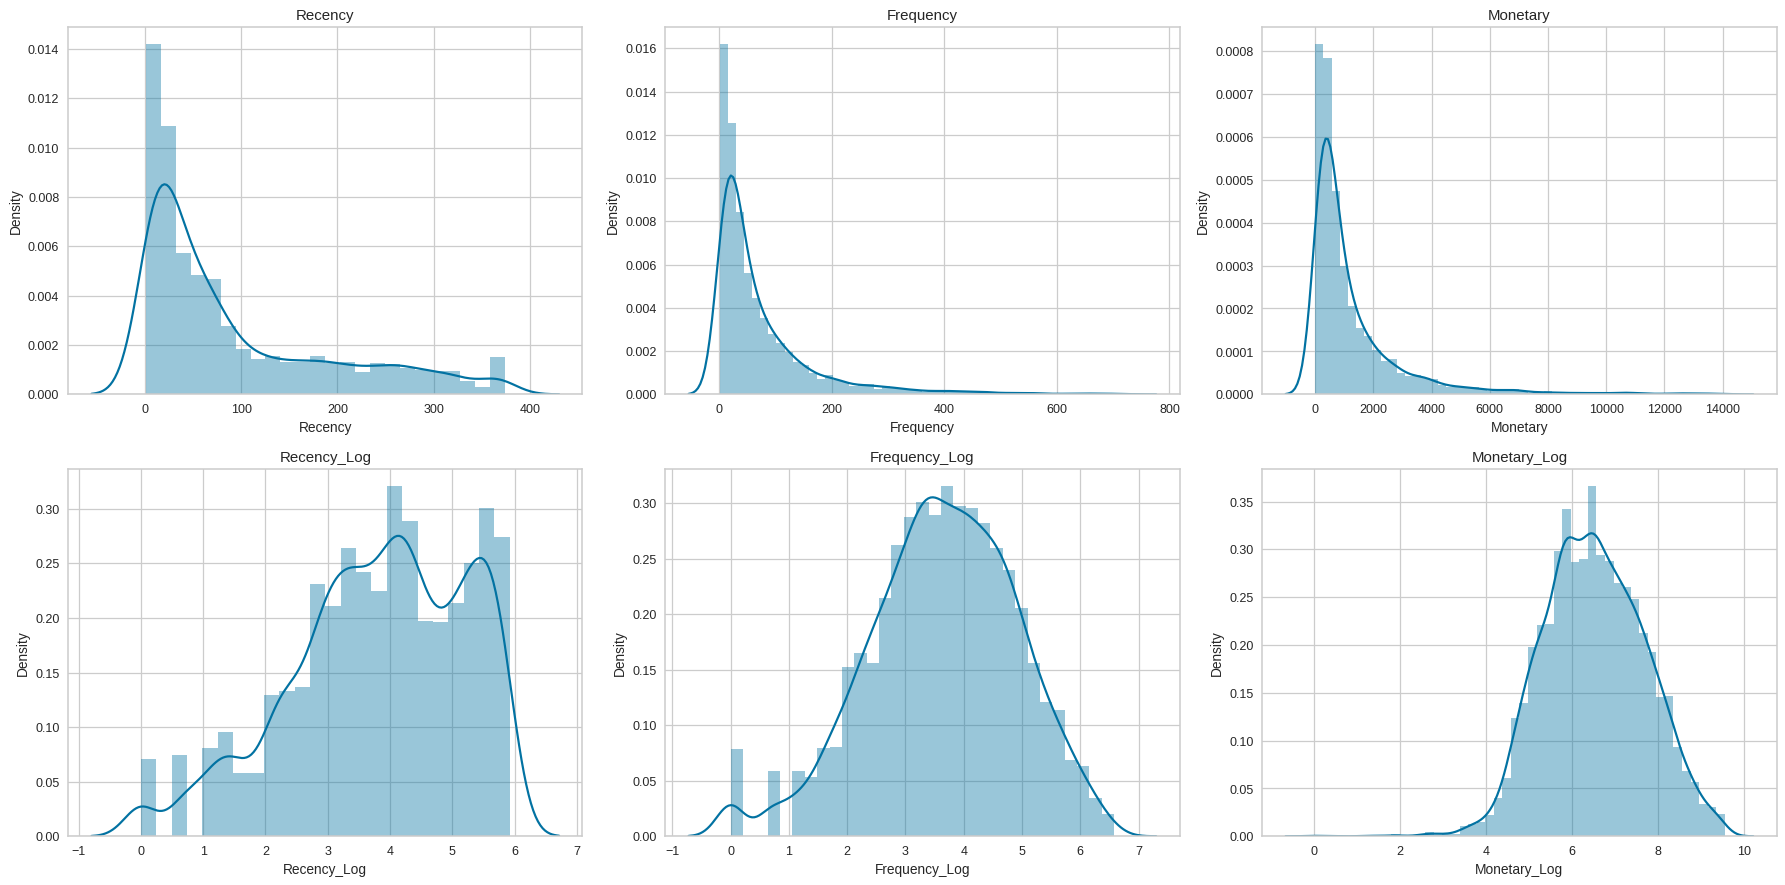

In [477]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

- Applying a logarithmic transformation (np.log) helps to normalize the data and reduce the impact of outliers.
- The logarithmic transformation is commonly used when dealing with highly skewed data as skewed data can negatively impact the performance of clustering algorithms such as K-means.
- In the case of RFM (Recency, Frequency, and Monetary), applying the logarithmic transformation can help to normalize the data and reduce the impact of extreme values.

### 5. Data Scaling

In [478]:
# Scaling your data

# Defining X Variables
X= rfm.iloc[:,4:7]
X_scaled = StandardScaler().fit_transform(X)

In [479]:
X.head(1)

,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,
12347.0,0.693147,5.204007,8.368693


In [480]:
rfm_scaled = pd.DataFrame(X_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled.head(5)

,Recency,Frequency,Monetary
0,-2.218896,1.233221,1.578985
1,0.363632,-0.151476,0.832926
2,-0.614736,0.518547,0.813879
3,1.374803,-0.621465,-0.601446
4,-0.159358,0.637608,1.116489


##### Which method have you used to scale you data and why?

- We have used Standard scaler for scaling data because it scales the data to have a mean of 0 and a standard deviation of 1. This helps to normalize the data and makes it easier to compare the relative importance of each feature.
- In the case of RFM (Recency, Frequency, and Monetary), these three KPIs are likely to be measured using different units, scales, and ranges.By applying the standard scaler to these features, we can bring them to a common scale and ensure that they are equally weighted when calculating the distance between data points.

## ***7. ML Model Implementation***

### ML Model - 1

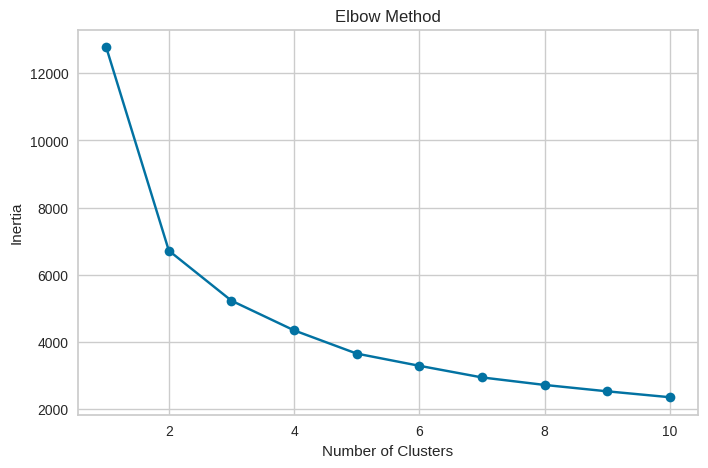

In [481]:
# Elbow-curve/SSD

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [482]:
# Creating a simple vanillae model with 2 clusters

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a KMeans model with five clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(rfm_scaled)

y_kmeans = kmeans.fit_predict(X)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**ML Model - K Means**

- KMeans is an unsupervised machine learning algorithm used for clustering. It groups similar data points into clusters based on their distance from a centroid.

**Evaluation Metrics**
- The **silhouette score** is a metric that measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the clusters are well-separated and each data point belongs to the right cluster. Conversely, a lower silhouette score suggests that the data points may be assigned to the wrong clusters.
- The **Calinski-Harabasz** index (also known as the Variance Ratio Criterion) is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. A higher Calinski-Harabasz score indicates better defined clusters that are well separated from each other.
- The **Davies-Bouldin index (DBI)** is another metric that can be used to evaluate the quality of clustering results. The DBI measures the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering results.

In [483]:
# Visualizing evaluation Metric Score chart

simple_kmeans_silhouette = silhouette_score(rfm_scaled, kmeans.fit_predict(rfm_scaled))
simple_kmeans_calinski_harabasz_score = calinski_harabasz_score(rfm_scaled, kmeans.fit_predict(rfm_scaled))
simple_kmeans_davies_bouldin_score = davies_bouldin_score(rfm_scaled, kmeans.fit_predict(rfm_scaled))

print("Silhouette score for simple KMeans model:", simple_kmeans_silhouette)
print("Calinski Harabasz score for simple KMeans model:", simple_kmeans_calinski_harabasz_score)
print("Davies Bouldin score for simple KMeans model:", simple_kmeans_davies_bouldin_score)

Silhouette score for simple KMeans model: 0.3940299942360767
Calinski Harabasz score for simple KMeans model: 3836.2830446994067
Davies Bouldin score for simple KMeans model: 0.9528887616968399


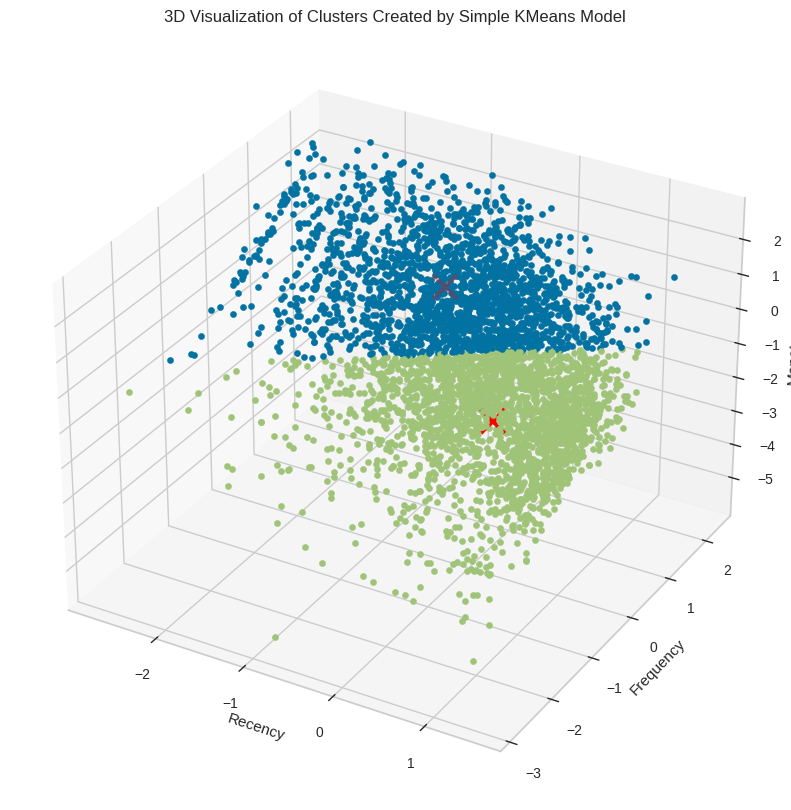

In [484]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign colors to the clusters
colors = ['b', 'g']

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color based on their cluster label
for i in range(len(kmeans.labels_)):
    label = kmeans.labels_[i]
    ax.scatter(rfm_scaled.iloc[i,0], rfm_scaled.iloc[i,1], rfm_scaled.iloc[i,2], color=colors[label])

# Plot the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], marker='x', s=300, linewidths=3, color='red')

# Set the properties of the plot
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Clusters Created by Simple KMeans Model')

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [485]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 200, 300]}
kmeans = KMeans(random_state=42)
clf = GridSearchCV(kmeans, parameters, cv=5)
clf.fit(rfm_scaled)

# Instantiate KMeans model with best hyperparameters
tuned_kmeans_model = KMeans(n_clusters=clf.best_params_['n_clusters'], random_state=42)
tuned_kmeans_model.fit(rfm_scaled)

# predicting model
y_best_kmeans = tuned_kmeans_model.fit_predict(X)

In [486]:
# print("Finally chosen parameters: ", grid_search.best_params_)

print("Finally chosen parameters: ", clf.best_params_)

Finally chosen parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5, 'n_init': 10}


##### Which hyperparameter optimization technique have you used and why?

- We used **GridSearchCV** because number of hyperparameters to tune is few, and it can search through all possible combinations of hyperparameters, which can lead to finding the optimal combination.

The hyperparameters that were finally chosen for the KMeans clustering algorithm were - 

- **'init': 'k-means++'**: This specifies the method for initialization of the centroids. 'k-means++' is a smart initialization method that attempts to select initial centroids that are distant from each other, in order to improve the quality of the final clustering result.

- **'max_iter': 100**: This specifies the maximum number of iterations for each run of the KMeans algorithm. If the algorithm does not converge within this number of iterations, it will stop and return the best result found so far.

- **'n_clusters': 5**: This specifies the number of clusters to be formed by the algorithm. In your case, the chosen value is 5.

- **'n_init': 10**: This specifies the number of times the KMeans algorithm will be run with different random initializations. The algorithm will return the result with the lowest SSE (sum of squared errors) among all the runs.


So, in summary, the hyperparameters that were finally chosen for the KMeans clustering algorithm were selected using GridSearchCV and are intended to produce the best possible clustering results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [487]:
# Tuned KMeans model Silhoutte score

tuned_kmeans_silhouette_score = silhouette_score(rfm_scaled, clf.best_estimator_.fit_predict(rfm_scaled))
tuned_kmeans_calinski_harabasz_score = calinski_harabasz_score(rfm_scaled, clf.best_estimator_.fit_predict(rfm_scaled))
tuned_kmeans_davies_bouldin_score = davies_bouldin_score(rfm_scaled, clf.best_estimator_.fit_predict(rfm_scaled))


print("Silhouette score for hyperparameter-tuned KMeans model:", tuned_kmeans_silhouette_score)
print("Calinski Harabasz score for hyperparameter-tuned KMeans model:", tuned_kmeans_calinski_harabasz_score)
print("Davies Bouldin score for hyperparameter-tuned KMeans model:", tuned_kmeans_davies_bouldin_score)

Silhouette score for hyperparameter-tuned KMeans model: 0.2822510412316947
Calinski Harabasz score for hyperparameter-tuned KMeans model: 2654.581031204071
Davies Bouldin score for hyperparameter-tuned KMeans model: 1.0634345100716733


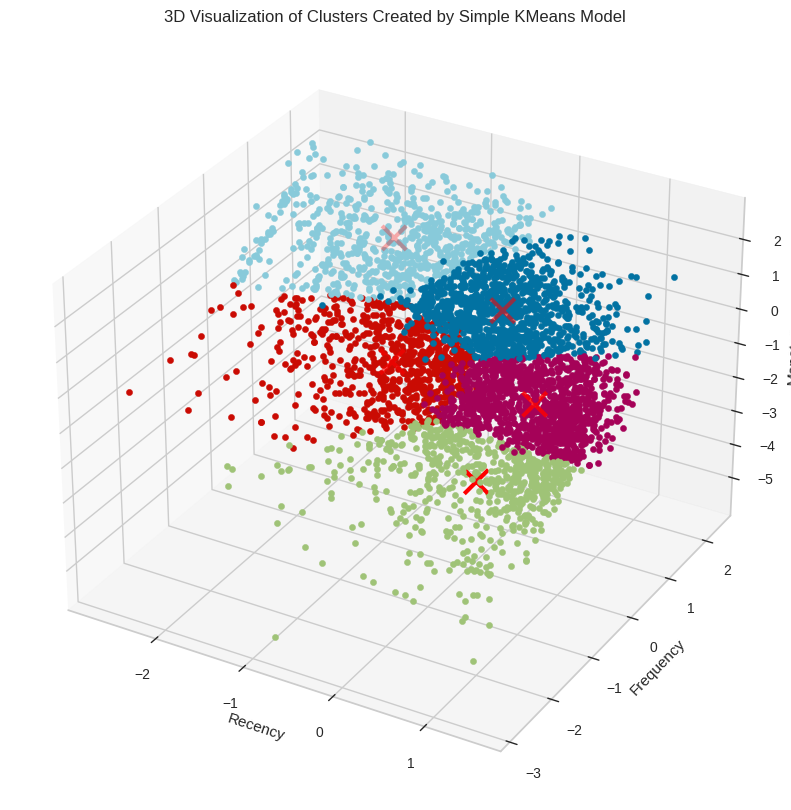

In [488]:
# Visualizing clusters along with their centroids

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign colors to the clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color based on their cluster label
for i in range(len(clf.best_estimator_.labels_)):
    label = clf.best_estimator_.labels_[i]
    ax.scatter(rfm_scaled.iloc[i,0], rfm_scaled.iloc[i,1], rfm_scaled.iloc[i,2], color=colors[label])

# Plot the centroids of the clusters
ax.scatter(clf.best_estimator_.cluster_centers_[:,0], clf.best_estimator_.cluster_centers_[:,1], clf.best_estimator_.cluster_centers_[:,2], marker='x', s=300, linewidths=3, color='red')

# Set the properties of the plot
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Clusters Created by Simple KMeans Model')

plt.show()

In [489]:
metrics = {'Silhouette': [silhouette_score(rfm_scaled, y_kmeans), silhouette_score(rfm_scaled, y_best_kmeans)],
           'Davies-Bouldin': [davies_bouldin_score(rfm_scaled, y_kmeans), davies_bouldin_score(rfm_scaled, y_best_kmeans)],
           'Calinski-Harabasz': [calinski_harabasz_score(rfm_scaled, y_kmeans), calinski_harabasz_score(rfm_scaled, y_best_kmeans)]}

df_metrics = pd.DataFrame(metrics, index=['Random K-Means', 'Tuned K-Means'])
df_metrics.head()

,Silhouette,Davies-Bouldin,Calinski-Harabasz
Random K-Means,0.391450,0.958521,3777.962789
Tuned K-Means,0.281916,1.073418,2619.991136


- In our case,all the three mertics are indicating better clustering in simple k means model. This means that the simple KMeans model is better at separating the customer data into distinct clusters, while the hyperparameter-tuned KMeans model may not be as effective at clustering the data.

- However, it's important to note that the choice of the best model depends on other factors as well, such as the problem you're trying to solve, the size of the dataset, and the interpretability of the results. So, even though the simple KMeans model has a higher silhouette score, it may not always be the best choice for clustering the data.

### ML Model - 2

In [490]:
# Choose the number of clusters
n_clusters = 4

# Choose the distance metric and linkage method
distance_metric = 'euclidean'
linkage_method = 'ward'

# Fit the hierarchical clustering model
model = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance_metric, linkage=linkage_method)
model.fit(X)

#Perdicting model
y_model = model.fit_predict(X)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**ML Model - Hierarchical Clustering**

- Hierarchical clustering is a type of clustering algorithm used in machine learning and data analysis that groups similar data points into clusters based on their distance or similarity to each other.
- The choice of distance metric and linkage criterion determines the performance and effectiveness of hierarchical clustering. Popular distance metrics include Euclidean distance, Manhattan distance, and cosine distance. Linkage criteria include single linkage, complete linkage, and average linkage.
- There are two types of hierarchical clustering:

   - Agglomerative hierarchical clustering: This starts with each data point as a separate cluster and then merges the closest pairs of clusters iteratively until all the points belong to a single cluster.

   - Divisive hierarchical clustering: This starts with all the data points in a single cluster and then recursively splits the cluster into smaller clusters until each point is in its own cluster.

**Evaluation Metrics**
- The **silhouette score** is a metric that measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the clusters are well-separated and each data point belongs to the right cluster. Conversely, a lower silhouette score suggests that the data points may be assigned to the wrong clusters.
- The **Calinski-Harabasz** index (also known as the Variance Ratio Criterion) is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. A higher Calinski-Harabasz score indicates better defined clusters that are well separated from each other.
- The **Davies-Bouldin index (DBI)** is another metric that can be used to evaluate the quality of clustering results. The DBI measures the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering results.

In [491]:
# Compute the metrics
silhouette = silhouette_score(X, model.labels_)
calinski_harabasz = calinski_harabasz_score(X, model.labels_)
davies_bouldin = davies_bouldin_score(X, model.labels_)

print("Silhouette score for simple hierarchical_clustering_ model:", silhouette)
print("Calinski Harabasz score for simple hierarchical_clustering_ model:", calinski_harabasz)
print("Davies Bouldin score for simple hierarchical_clustering_ model:", davies_bouldin)

Silhouette score for simple hierarchical_clustering_ model: 0.2503515647229134
Calinski Harabasz score for simple hierarchical_clustering_ model: 2238.5379327423384
Davies Bouldin score for simple hierarchical_clustering_ model: 1.101462504661399


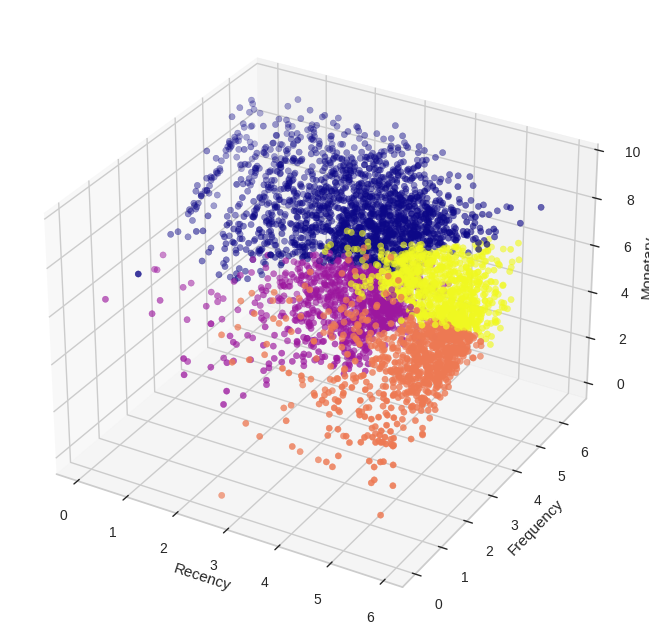

In [492]:
# Plot the clusters in 3D view
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency_Log'], X['Frequency_Log'], X['Monetary_Log'], c=model.labels_,cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [493]:
# Tune the hyperparameters using GridSearchCV

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid for the model
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['euclidean', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average']
}

# Choose the scoring metric for hyperparameter tuning
from sklearn.metrics import make_scorer
scorer = make_scorer(silhouette_score, greater_is_better=True)

# Set up the grid search cross-validation
model = AgglomerativeClustering()
grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scorer)
grid_search.fit(X)
best_params = grid_search.best_params_
best_hierarchy = grid_search.best_estimator_
y_best_hierarchy = best_hierarchy.fit_predict(X)

In [494]:
print("Finally chosen parameters: ", grid_search.best_params_)

Finally chosen parameters:  {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}


##### Which hyperparameter optimization technique have you used and why?

- We used **GridSearchCV** because number of hyperparameters to tune is few, and it can search through all possible combinations of hyperparameters, which can lead to finding the optimal combination.

The chosen hyperparameters are specific settings for a clustering algorithm, where:

- **'affinity'**: This parameter specifies the distance metric to be used in the clustering algorithm. In this case, the 'euclidean' distance metric is used for clustering algorithms to measure the similarity between data points.

- **'linkage'**: This parameter specifies the criterion used to measure the distance between clusters during the clustering process. In this case, the 'ward' criterion to minimizes the variance of the distances between the clusters being merged.

- **'n_clusters'**: This parameter specifies the number of clusters to be formed by the algorithm. In this case, the algorithm will form 2 clusters.


So, in summary, the hyperparameters that were finally chosen for the Hierarchical clustering algorithm were selected using GridSearchCV and are intended to produce the best possible clustering results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [495]:
# Tuned hierarchical_cluster model Silhoutte score

tuned_hierarchical_cluster_silhouette_score = silhouette_score(X, grid_search.best_estimator_.fit_predict(X))
tuned_hierarchical_cluster_calinski_harabasz_score = calinski_harabasz_score(X, grid_search.best_estimator_.fit_predict(X))
tuned_hierarchical_cluster_davies_bouldin_score = davies_bouldin_score(X, grid_search.best_estimator_.fit_predict(X))


print("Silhouette score for hyperparameter tuned hierarchical cluster model:", tuned_hierarchical_cluster_silhouette_score)
print("Calinski Harabasz score for hyperparameter tuned hierarchical cluster model:", tuned_hierarchical_cluster_calinski_harabasz_score)
print("Davies Bouldin score for hyperparameter tuned hierarchical cluster model:", tuned_hierarchical_cluster_davies_bouldin_score)

Silhouette score for hyperparameter tuned hierarchical cluster model: 0.3839411478957029
Calinski Harabasz score for hyperparameter tuned hierarchical cluster model: 3555.6062525027874
Davies Bouldin score for hyperparameter tuned hierarchical cluster model: 0.9688880336490425


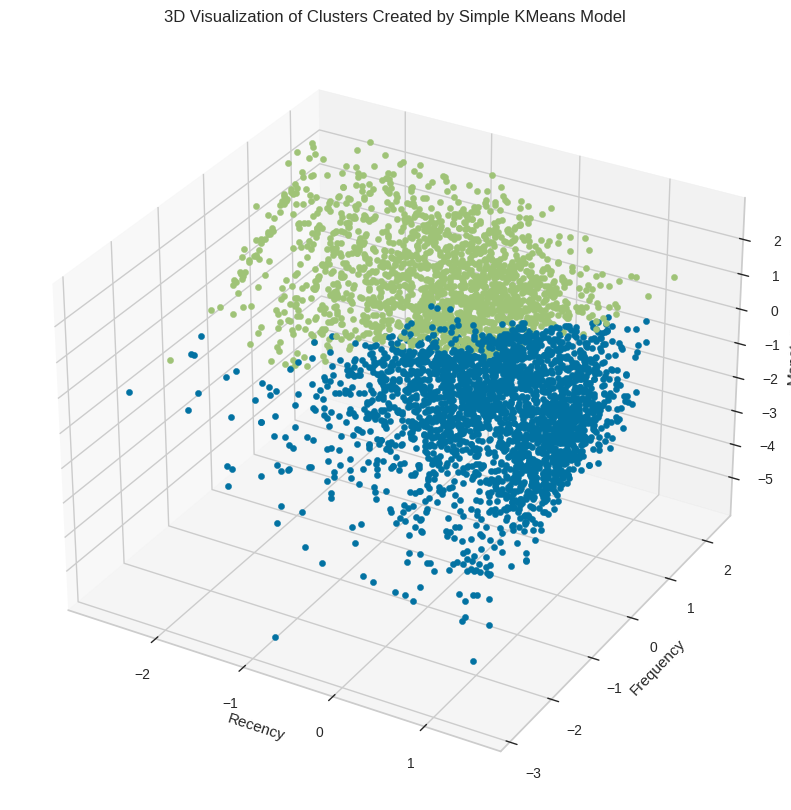

In [496]:
# Visualizing clusters along with their centroids

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign colors to the clusters
colors = ['b', 'g']

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color based on their cluster label
for i in range(len(grid_search.best_estimator_.labels_)):
    label = grid_search.best_estimator_.labels_[i]
    ax.scatter(rfm_scaled.iloc[i,0], rfm_scaled.iloc[i,1], rfm_scaled.iloc[i,2], color=colors[label])

# Set the properties of the plot
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Clusters Created by Simple KMeans Model')

plt.show()

In [497]:
metrics = {'Silhouette': [silhouette_score(X, y_model), silhouette_score(X, y_best_hierarchy)],
           'Davies-Bouldin': [davies_bouldin_score(X, y_model), davies_bouldin_score(X, y_best_hierarchy)],
           'Calinski-Harabasz': [calinski_harabasz_score(X, y_model), calinski_harabasz_score(X, y_best_hierarchy)]}

df_metrics = pd.DataFrame(metrics, index=['Random Hierarchical Clustering', 'Tuned Hierarchical Clustering'])
df_metrics.head()

,Silhouette,Davies-Bouldin,Calinski-Harabasz
Random Hierarchical Clustering,0.250352,1.101463,2238.537933
Tuned Hierarchical Clustering,0.383941,0.968888,3555.606253


-  Tuned hierarchical clustering algorithm performs better than the random hierarchical clustering algorithm based on all three metrics, indicating that it is a better choice for clustering the data.
- However, it's important to note that the choice of the best model depends on other factors as well, such as the problem you're trying to solve, the size of the dataset, and the interpretability of the results. So, even though the Tuned Hierarchical Clustering Model has a higher silhouette score, it may not always be the best choice for clustering the data.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Metric's indication towards business**
- A high Silhouette score means that the clustering model can effectively segment the customer base into distinct groups based on their RFM values.
- A low Davies-Bouldin index means that the clustering model can create well-defined and well-separated clusters that can be easily interpreted by the business.
- A high Calinski-Harabasz index means that the clustering model can create clusters that are well-separated and distinct from each other, and that the variance between clusters is large compared to the variance within clusters. This can help businesses to identify the most valuable customer segments and allocate their resources to maximize revenue and profitability.


**Impact of hierarchical clustering model on RFM analysis**
- Hierarchical clustering can provide businesses with a powerful tool for customer segmentation and analysis. By using this method to group customers based on RFM values, businesses can gain a deeper understanding of their customer base and develop data-driven strategies to improve customer engagement, loyalty, and profitability.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- It's generally recommended to use a combination of objective metrics and subjective judgment to evaluate the performance of a clustering model.
- Objective metrics can provide a quantitative measure while subjective judgment can provide a qualitative assessment of the results based on domain knowledge. This combined approach can help to ensure a comprehensive and well-informed evaluation of the model's performance.

Given these metrics, we can say that the Calinski-Harabasz index has the most positive business impact for the tuned K-Means model. A high Calinski-Harabasz index indicates that the clusters are well-separated and distinct, and that the variance between clusters is large compared to the variance within clusters. This can help businesses to identify the most valuable customer segments and allocate their resources to maximize revenue and profitability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Hyperparameter Tuned K-Means Clustering Model**

- It's not uncommon for clustering models with fewer clusters to have higher Silhouette scores compared to models with more clusters. This is because having fewer clusters can result in more distinct and well-separated clusters, leading to a higher Silhouette score. However, the number of clusters should ultimately be determined by the business objectives and the insights you are trying to extract from the data.
- While the simple k means model with 2 clusters has a higher Silhouette score,but the hyperparameter tuned k means model with 5 clusters looks better on visualization, indicating more distinct and well-separated clusters. Moreover it aligns better with our business objective of wide customer segmentation.
- It is worth sacrificing a slightly lower Silhouette score for the benefits of having more clusters. More clusters can provide a more granular view of the data, enabling more targeted and specific marketing strategies. 
- Moreover visualizations of the clusters indicate a clear separation of customer groups, which indicates that the clustering model is effective in segmenting the customer base.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [498]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/4258 [00:00<?, ?it/s]

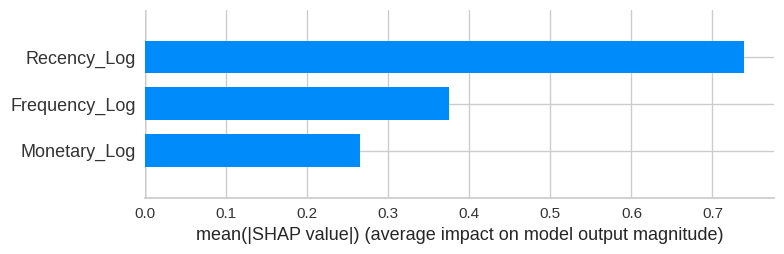

In [499]:
# SHAP analysis
import shap

background_data = shap.sample(X, 100)
explainer = shap.KernelExplainer(tuned_kmeans_model.predict, background_data)
shap_values = explainer.shap_values(X)

# Visualize SHAP values
shap.summary_plot(shap_values, X, plot_type="bar")

- The magnitude of the SHAP value represents the strength of the impact of that feature on the model's prediction.
- In summary, based on the output it appears that recency has the strongest impact on the model's predictions, followed by frequency and monetary.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [500]:
# Save the File

import pickle
with open('tuned_kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [501]:
# Save the File
import pickle
with open('tuned_kmeans_model.pkl', 'wb') as f:
    pickle.dump(tuned_kmeans_model, f)

In [502]:
# Load the File and predict unseen data.
with open('tuned_kmeans_model.pkl', 'rb') as f:
    kmeans_loaded = pickle.load(f)

In [503]:
# Use the loaded model to predict unseen data.
X_test = np.array([[100, 50, 100],[1, 5, 1],[20, 35, 70], [100, 50, 100],[5, 10, 200]])
y_pred = kmeans_loaded.predict(X_test)
# Print the predicted labels
print(y_pred)

[1 3 4 1 4]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- In this project, we used machine learning algorithms to segment customer data and gain insights into customer behavior. We applied two clustering models - KMeans and Hierarchical Clustering - to the dataset and evaluated their performance using Silhouette score, Calinski-Harabasz index, and Davies-Bouldin index.

- Our analysis showed that the Hyperparameter Tuned KMeans model with five clusters was the most effective in clustering the data and identifying distinct customer groups. Although the Simple KMeans model with two clusters had a higher Silhouette score, the Hyperparameter Tuned KMeans model's visualization indicated more distinct and well-separated clusters, which aligns better with our business objective of wide customer segmentation.

- It is important to note that the choice of the best model depends on other factors, such as the problem you're trying to solve, the size of the dataset, and the interpretability of the results. Therefore, our choice of the Hyperparameter Tuned KMeans model with five clusters was based on our specific business objectives.

- Overall, our analysis provides valuable insights into customer segmentation and can guide targeted and specific marketing strategies to increase customer satisfaction and loyalty.

### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***